This notebook 

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
from scipy.special import comb

Clear graph:

In [61]:
G.clear()

Input Graph: This is the graph that we will create a sample space for using constraint multipliers obtains in an ERGM

Links = 18.0
Trianges = 3.0


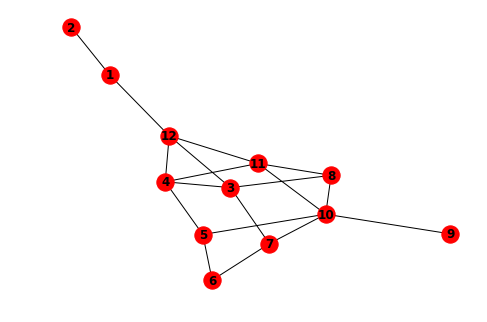

In [62]:
"""
Attribution:
By Schulllz - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=31211459
Sourced from https://en.wikipedia.org/wiki/Small-world_network on 11/30/2018
As an example of a small world graph, with edit for node 9 to have at least 1 link
"""

G = nx.Graph([(1,2),(1,12),(3,4),\
              (3,7),(3,8),(3,12),\
              (4,5),(4,11),(4,12),\
              (5,6),(5,10),(6,7),\
              (7,10),(8,10),(8,11),\
              (9,10),(10,11),(11,12)])
nx.draw(G,with_labels=True,font_weight='bold')
links = nx.degree(G)
degree=0
for x in links:
    degree+=x[1]
print("Links =",degree/2)
count=0
for k,v in nx.triangles(G).items():
    count+=v
count=count/3
print("Trianges =",count)

Create a single gilbert graph

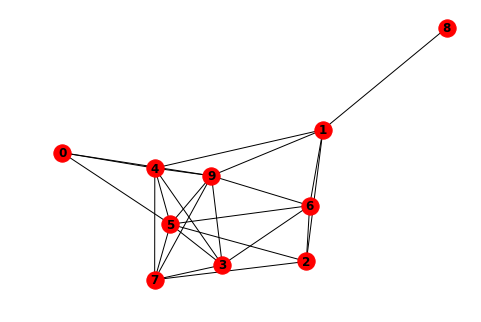

In [63]:
G = nx.Graph()
n = 10
p = .5
for i in range(n):
    G.add_node(i)

for i in range(n):
    for j in range(i+1,n):
        if random.random()<p:
            G.add_edge(i,j)
nx.draw(G,with_labels=True,font_weight='bold')
#G.clear()"

Print the link list, degrees, and links of the previously generated graph:

In [64]:
links = nx.degree(G)
print("Links =",links)
degree=0
for x in links:
    degree+=x[1]
print("Degrees =",degree)
print("Link Count =",degree/2)

Links = [(0, 3), (1, 5), (2, 4), (3, 5), (4, 6), (5, 7), (6, 5), (7, 5), (8, 1), (9, 7)]
Degrees = 48
Link Count = 24.0


Print the average degrees of the above graph:

In [65]:
average_degree = degree / n
print("Average Degree =",average_degree)

Average Degree = 4.8


Show the degree of each node:

Degrees per Node


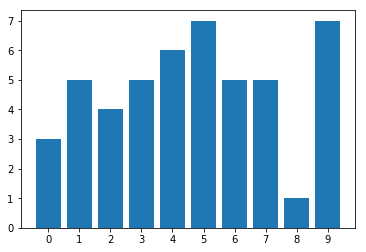

In [66]:
h_dict={}
for i in range(0,n):
    h_dict[i]=links[i]

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

print("Degrees per Node")
hist_dict(h_dict)

And the distribution of degrees in this particular graph:

Distribution of degrees


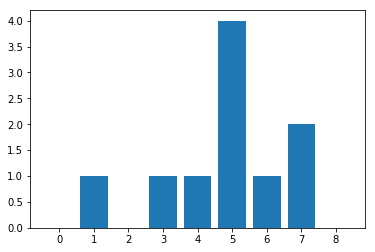

In [67]:
h_dict={}
for i in range(0,n-1):
    h_dict[i]=0
    
for i in links:
    p=links[i[0]]
    h_dict[p]+=1

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

print("Distribution of degrees")
hist_dict(h_dict)

Counting triangles algorithmically, then verifying the count using the nx.triangles(graph) function:

In [68]:
def count_triangles(n): #global method
    nodes = G.nodes()
    triangles = 0
    for node in nodes:
        temp_list=list()
        temp_edge_list=list()
        for edge in G.edges(node):
            if len(temp_list) > 0:
                for val in temp_list:
                    temp_tuple = (val,edge[1])
                    temp_edge_list.append(temp_tuple)
            temp_list.append(edge[1])
        for tup in temp_edge_list:
            for edge in G.edges():
                if tup==edge: triangles+=1
    return(triangles/3)


tri=count_triangles(n)
print(tri)

def verify_triangles():
    count=0
    for k,v in nx.triangles(G).items():
        count+=v
    return(count/3)
ver_tri = verify_triangles()
if tri == ver_tri: print("Verified with nx.triangles count")
elif tri != ver_tri: print("ERROR IN TRIANGLE COUNT")

21.0
Verified with nx.triangles count


Combining all of the previous concepts to show the distribution of links and triangles across many graphs:

The distribution of the mean number of links for a
graph of 10 nodes and 0.5 probability of an edge
across 1000 iterations is:


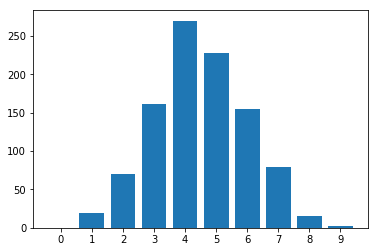

And the corresponding distribution for average triangles is:


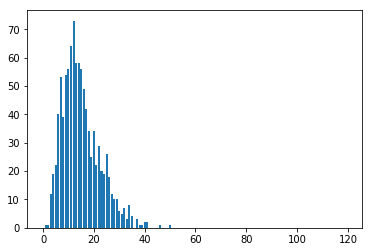

In [69]:
n=int(10)
p=float(0.5)
itera=1000
nchoose3=comb(n,3,exact=True)

h_dict={}
for i in range(0,n):
    h_dict[i]=0

t_dict={}
for i in range(0,nchoose3):
    t_dict[i]=0

def dict_nonblank_len(dict_):
    var = 0
    for k,v in dict_.items():
        if v>0: var=k
    return(var)

def ergn(h_dict,t_dict,n,p,itera):
    for i in range(itera):
        try:
            G.clear()
        except:
            pass
        G = nx.Graph()
#        n = 10
#        p = .5
        for i in range(n):
            G.add_node(i)
        for i in range(n):
            for j in range(i+1,n):
                if random.random()<p:
                    G.add_edge(i,j)
        links = nx.degree(G),
        for i in links:
            q=i[0]
            h_dict[q]+=1
        count=0
        for k,v in nx.triangles(G).items():
            count+=v
        count=count/3
        t_dict[count]+=1
    return(h_dict)

def hist_dict(dict_):
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

def hist_dict2(dict_): # Needs update to length to limit it to actual highest key that returns a value > 1\n"
    var = dict_nonblank_len(dict_)
    plt.bar(range(len(dict_)), list(dict_.values()), width = .8,align= "center")
#    plt.xticks(range(len(dict_)),list(dict_.keys()))
    plt.show()

i_dict = ergn(h_dict,t_dict,n,p,itera)
print("The distribution of the mean number of links for a")
print("graph of",n,"nodes and",p,"probability of an edge")
print("across",itera,"iterations is:")
hist_dict(i_dict)
print("And the corresponding distribution for average triangles is:")
hist_dict2(t_dict)
#print(t_dict)"

Converting the above to instead provide data over time rather than summarizations.
Additionally, adding burn in and thinning.

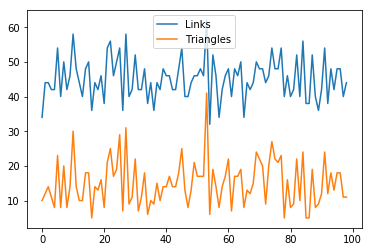

In [70]:
n = int(10)
p = float(0.5)
itera = 1100
burn = 100
thin = 10
nchoose3 = comb(n,3,exact=True)

l_list=[]
t_list=[]

def ergn(l_list,t_list,n,p,itera,burn,thin):
    for a in range(itera):
        try:
            G.clear()
        except:
            pass
        G = nx.Graph()
        for q in range(n):
            G.add_node(q)
        for i in range(n):
            for j in range(i+1,n):
                if random.random()<p:
                    G.add_edge(i,j)
        if a > burn:
            if a%thin==0:
                links = nx.degree(G)
                l_count=0
                for x in links:
                    l_count+=x[1]
                l_list.append(l_count)
                t_count=0
                for k,v in nx.triangles(G).items():
                    t_count+=v
                t_count=t_count/3
                t_list.append(t_count)
    return(l_list,t_list)


l_list,t_list = ergn(l_list,t_list,n,p,itera,burn,thin)
plt.plot(l_list,label="Links")
plt.plot(t_list,label="Triangles")
plt.legend()
plt.show()


#print(t_dict)"

Adding the steps to probabilistically alter a single graph

In [ ]:
alpha = 1 #newly specified parameter
gamma = 1 #newly specified parameter
n = int(10)
p = float(0.5)
itera = 1100
burn = 100
thin = 10
nchoose3 = comb(n,3,exact=True)

l_list=[]
t_list=[]

def pgprime_pg(m,mp,t,tp): #links, links prime, triangles, triangles prime
    # e ^( (alpha * (m(G')-m(G))) + (gamma * (t(G')-t(G))))
    

def ergn(l_list,t_list,n,p,itera,burn,thin):
    for a in range(itera):
        try:
            G.clear()
        except:
            pass
        G = nx.Graph()
        for q in range(n):
            G.add_node(q)
        for i in range(n):
            for j in range(i+1,n):
                if random.random()<p:
                    G.add_edge(i,j)
        if a > burn:
            if a%thin==0:
                links = nx.degree(G)
                l_count=0
                for x in links:
                    l_count+=x[1]
                l_list.append(l_count)
                t_count=0
                for k,v in nx.triangles(G).items():
                    t_count+=v
                t_count=t_count/3
                t_list.append(t_count)
    return(l_list,t_list)


l_list,t_list = ergn(l_list,t_list,n,p,itera,burn,thin)
plt.plot(l_list,label="Links")
plt.plot(t_list,label="Triangles")
plt.legend()
plt.show()


#print(t_dict)"